In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

In [2]:
#Import data set
data = pd.read_csv("E:\Aegis\Kaggle\creditcardfraud/creditcard.csv")
df = data

In [3]:
#Print the size of data set
print(df.shape)

(284807, 31)


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
#Check for missing values in the data
df.apply(lambda x: sum(x.isnull()))

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

---------------------------------------------------------
          There are no missing values in the data
---------------------------------------------------------

In [7]:
#check for categorical varaibles in the data
df.apply(lambda x: len(x.unique()))

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


_________________________________________________________________________________________________________________


From the above analysis it is clear that 
    1. There are no missing values in the data.
    2. "Time" variable keeps on increasing from first observation to last observation.
    3. "Amount" attribute contains higher range values when it is compared to other set of independent variables.
        So we need to normalize the all the independent variables to same range if we are going to apply logistic model.
    
    
    
___________________________________________________________________________________________________________________

In [9]:
#First we drop the "Time" from our dataframe
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#Finding correlation among the numerical variables
df_corr = df.copy()
del df_corr['Class']

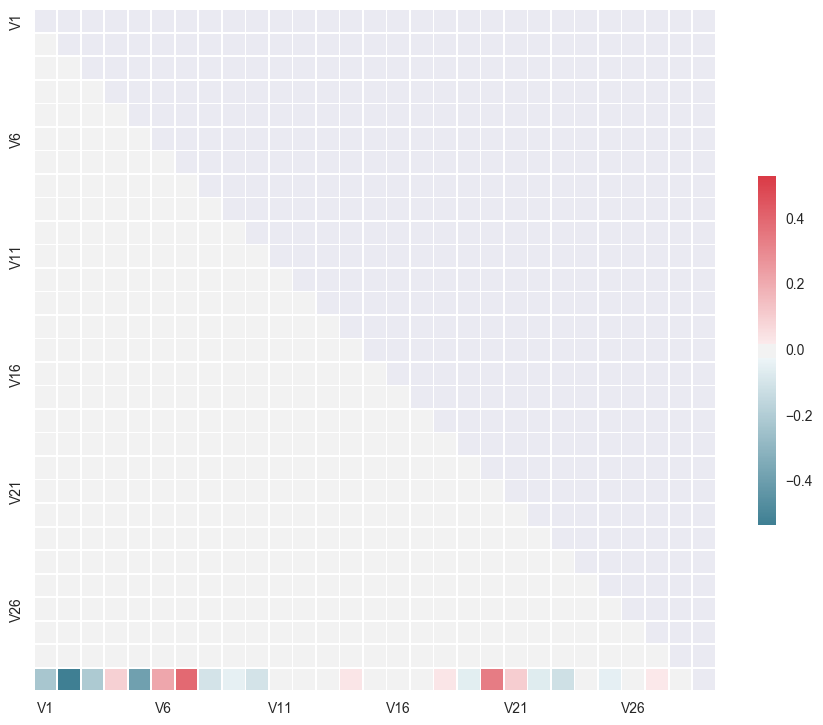

In [11]:
#Compute correlation matrix
corr = df_corr.corr()
import seaborn as sns
%matplotlib inline
#
#Generate a mask for upper  traingle
#
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] =True
#
#Set up matplotlib figure
#
f, ax = plt.subplots(figsize=(11, 9))
#
#Generate a custom diverging color map
#
cmap= sns.diverging_palette(220, 10, as_cmap= True)
#
#Draw the heat map with the mask and correct aspect ratio
#
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [12]:
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,...,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709
V2,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,...,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409
V3,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,...,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880
V4,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,...,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732
V5,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,...,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356
V6,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,...,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981
V7,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,...,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311
V8,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,...,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079
V9,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,...,-4.340941e-16,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246
V10,7.433820e-17,-4.782388e-16,6.289267e-16,6.055490e-16,-6.601716e-16,2.850776e-16,3.043333e-17,9.051847e-17,-2.771761e-16,1.000000e+00,...,-1.141888e-15,8.089504e-16,-6.707598e-16,3.809732e-16,-4.032806e-17,-2.863813e-16,-2.554293e-16,-3.103239e-16,-1.515934e-16,-0.101502


# There is no correlation blw the input variables

0    284315
1       492
Name: Class, dtype: int64


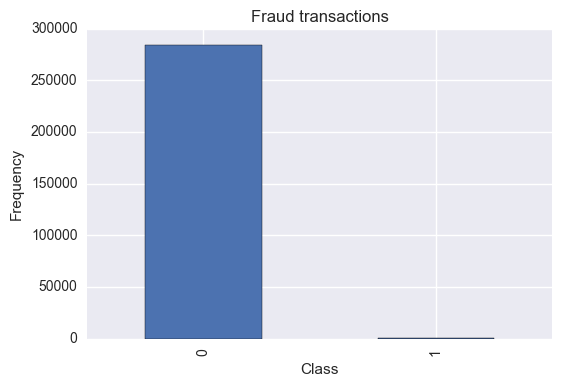

In [13]:
#__Analysing the output categorical variable____#
#
%matplotlib inline
count_classes = pd.value_counts(df.Class, sort = True).sort_index()
print(count_classes)

#Plotting the output
count_classes.plot(kind="bar")
plt.title("Fraud transactions")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [14]:
#____Calculating Base line accuracy___#
from __future__ import division
base_line_accuracy = 284315/(284315+492)
print(base_line_accuracy)

0.9982725143693799


_______________________________________________________________________________________________________________
Following points are clear from the above analysis.
    1. base_line_accuracy itself measures to be 99.8%
    2. It is very much clear that dataset is highly imbalanced.
    3. So dataset needs be "undersampled" or "oversampled" to make sure that output labels are of same number.

_________________________________________________________________________________________________________________

In [15]:
print(count_classes)

0    284315
1       492
Name: Class, dtype: int64


#Approach1:
    
#______Under sampling Technique____#

#In this approach we randomly take 492 samples from "Class variable 0" (Since Class 1 has less no.of variables)


In [16]:
no_frauds = len(df[df.Class ==1])
print("No.of fradulent transactions are : ", no_frauds)

#Find the index related to fraud transactions
fraud_index = np.array(df[df.Class ==1].index)

#now take the indices of normal transactions
normal_indices = df[df.Class ==0].index

#Now pick the random samples 

random_normal_indices = np.random.choice(normal_indices, no_frauds, replace=False)
random_normal_indices = np.array(random_normal_indices)

#Now we combine both random indices and fradulent indices

appended_indices = np.concatenate([fraud_index, random_normal_indices])

#Now using indices get the data from those indices

appended_data_set = df.iloc[appended_indices, :]
appended_data_set.head()

No.of fradulent transactions are :  492


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [17]:
appended_data_set.shape

(984, 30)

In [18]:
under_sample_count_classes = pd.value_counts(appended_data_set.Class, sort = True).sort_index()
print(under_sample_count_classes)

0    492
1    492
Name: Class, dtype: int64


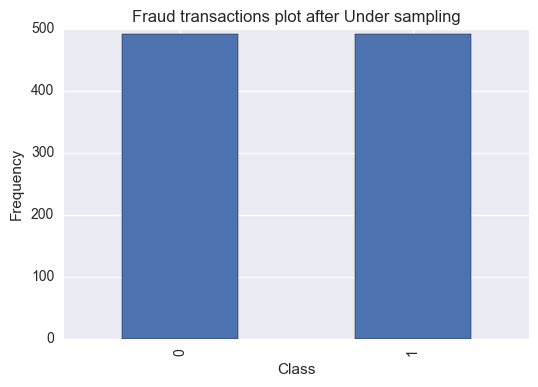

In [19]:
under_sample_count_classes.plot(kind="bar")
plt.title("Fraud transactions plot after Under sampling")
plt.xlabel("Class")
plt.ylabel("Frequency")

#Now we have equal no.of class labels

In [20]:
#We now differentiate the input attributes and output labels
X_under = appended_data_set.ix[:, df.columns != "Class"]
Y_under = appended_data_set.ix[:, df.columns == "Class"]


#Now we normalize all the input variables to same range
import math
X_norm_under = (X_under - X_under.mean())/(X_under.max() - X_under.min())
#
X_norm_under.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,0.004833,0.003935,0.054155,0.105820,0.032381,-0.060003,0.005138,0.017653,-0.071492,0.001773,...,-0.002003,0.002810,-0.002580,-0.017448,0.117166,0.004036,0.036906,0.015652,-0.010591,-0.042156
623,-0.017411,-0.129850,0.131859,-0.000759,0.089066,-0.031919,0.063031,-0.006252,0.049974,0.056784,...,0.082321,0.005699,0.024698,0.057031,-0.073801,0.037696,-0.041005,-0.024354,-0.000466,0.157768
4920,0.005103,-0.001112,0.090155,0.001835,0.023362,0.044867,0.067818,-0.011680,0.051563,0.037245,...,-0.025777,-0.013418,-0.054603,0.008358,-0.009584,-0.024668,-0.136770,-0.001597,-0.011142,0.048520
6108,-0.058607,-0.011609,0.025848,0.023631,0.014130,-0.081740,-0.014251,-0.009217,0.051101,-0.055961,...,-0.014746,0.003937,0.009711,-0.016275,0.000938,0.033777,-0.164458,-0.069066,0.045554,-0.019858
6329,0.112702,0.031894,-0.023446,0.151643,0.157270,-0.054661,0.091096,-0.013272,0.000792,0.011013,...,-0.007034,-0.015116,-0.041373,-0.025199,-0.490211,0.210677,0.130668,-0.005457,0.005812,-0.041778


All the preprocessing steps are completed.

Now we have split the data into training_set and test_set.

In [21]:
from sklearn.cross_validation import train_test_split
X_norm_under_train,X_norm_under_test,Y_norm_under_train,Y_norm_under_test = train_test_split(X_norm_under, Y_under, test_size = 0.3, random_state =0)
print("Size of training dataset: ", len(X_norm_under_train))
print("Size of test dataset: ", len(X_norm_under_test))

Size of training dataset:  688
Size of test dataset:  296


In [22]:
print("The no.of class labels in training set: ")
print(pd.value_counts(Y_norm_under_train.Class, sort = True).sort_index())
print("The no.of class labels in test set : ")
print(pd.value_counts(Y_norm_under_test.Class, sort = True).sort_index())

The no.of class labels in training set: 
0    343
1    345
Name: Class, dtype: int64
The no.of class labels in test set : 
0    149
1    147
Name: Class, dtype: int64


In [29]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

def printing_Kfold_scores(x_train, y_train):
    fold = KFold(len(y_train), 5, shuffle=False)
    #
    #Defining C-parameters
    
    c_parm_range = [0.01,0.1,1,10,100]
    
    results_table= pd.DataFrame(index=range(len(c_parm_range),2), columns=['C_Parameter','Mean recall score'])
    
    results_table['C_Parameter'] = c_parm_range
    
    j=0
    for c_parm in c_parm_range:
        print("___________________________________________")
        print("C parameter: ", c_parm)
        print("___________________________________________")
        print("")
        recall_accs =[]
        for iteration, indices in enumerate(fold, start=1):
            #Call logistic with each c-parameter
            lr = LogisticRegression(C= c_parm, penalty='l1')
            
            lr.fit(x_train.iloc[indices[0],:], y_train.iloc[indices[0],:].values.ravel())
            
            y_pred_undersample=lr.predict(x_train.iloc[indices[1],:].values)
            
            recall_acc = recall_score(y_train.iloc[indices[1],:].values, y_pred_undersample)
            
            recall_accs.append(recall_acc)
            
            print("Iteration : ", iteration, " : recall score = ",recall_acc)
        
        results_table.ix[j, "Mean recall score"] = np.mean(recall_acc)
        
        j+=1
        
        print(""),
        print("Mean recall score ", np.mean(recall_accs))
        print(""),
    
    best_c = results_table.loc[results_table["Mean recall score"].idxmax()]['C_Parameter']
    print("_____________________________________________________________________________________")
    print("Best model with c-parm is ", best_c)
    
    return best_c

In [30]:
best_c = printing_Kfold_scores(X_norm_under_train, Y_norm_under_train)

___________________________________________
C parameter:  0.01
___________________________________________

Iteration :  1  : recall score =  0.0
Iteration :  2  : recall score =  0.0
Iteration :  3  : recall score =  0.0
Iteration :  4  : recall score =  0.0
Iteration :  5  : recall score =  0.0

Mean recall score  0.0

___________________________________________
C parameter:  0.1
___________________________________________

Iteration :  1  : recall score =  0.780821917808
Iteration :  2  : recall score =  0.835616438356
Iteration :  3  : recall score =  0.830508474576
Iteration :  4  : recall score =  0.891891891892
Iteration :  5  : recall score =  0.863636363636

Mean recall score  0.840495017254

___________________________________________
C parameter:  1
___________________________________________

Iteration :  1  : recall score =  0.821917808219
Iteration :  2  : recall score =  0.849315068493
Iteration :  3  : recall score =  0.915254237288
Iteration :  4  : recall score =  0.9

In [31]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(C=100, penalty= 'l1')
lr1.fit(X_norm_under_train, Y_norm_under_train)
Y_predict_lr1 = lr1.predict(X_norm_under_test)

C:\Users\Ajith Vajrala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cnf_matrix = confusion_matrix(Y_norm_under_test, Y_predict_lr1)
cnf_matrix

array([[142,   7],
       [ 11, 136]])

In [33]:
#Plot confusion matrixri
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("true label")
    plt.xlabel("predictedc label")

accuracy :  0.925170068027


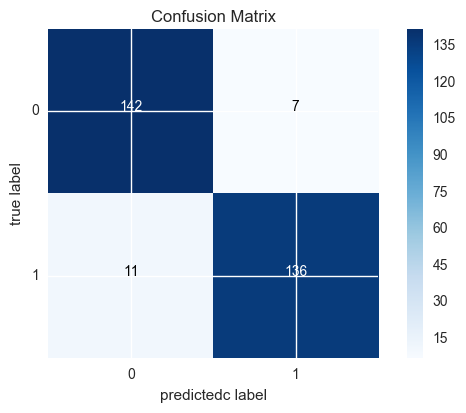

In [35]:
np.set_printoptions(precision=2)
print("accuracy : ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
class_names =[0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title= "Confusion Matrix")
plt.show()

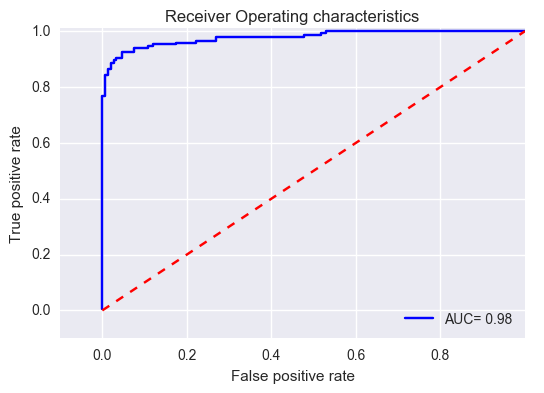

In [36]:
#AUC
y_pred_undersample_score = lr1.fit(X_norm_under_train, Y_norm_under_train.values.ravel()).decision_function(X_norm_under_test.values)
fpr, tpr, thresholds = roc_curve(Y_norm_under_test, y_pred_undersample_score)
roc_auc = auc(fpr, tpr)

#plot ROC
plt.title("Receiver Operating characteristics")
plt.plot(fpr, tpr, 'b', label="AUC= %0.2f" %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=0)
clf1.fit(X_norm_under_train,Y_norm_under_train)

C:\Users\Ajith Vajrala\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

[[144   5]
 [ 15 132]]
recall Metric in the test set:  0.897959183673


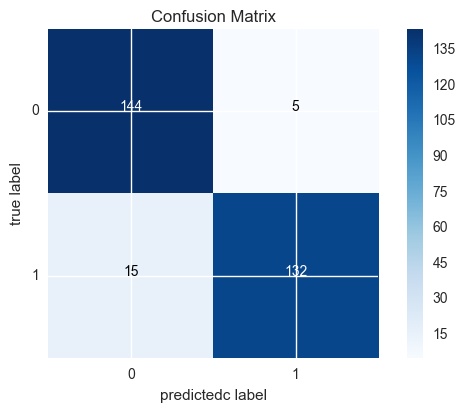

In [41]:
from __future__ import division
y_under_pred = clf1.predict(X_norm_under_test)
print(confusion_matrix(Y_norm_under_test, y_under_pred))
cnf_matrix = confusion_matrix(Y_norm_under_test, y_under_pred)
np.set_printoptions(precision=2)
print("recall Metric in the test set: ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion Matrix")
plt.show()

In [42]:
accuracy_RF_Under= (145+133)/(145+4+14+133)
accuracy_RF_Under

0.9391891891891891

In [43]:
# SVM 
from sklearn import svm

In [44]:
clf = svm.SVC()
clf.fit(X_norm_under_train,Y_norm_under_train)

C:\Users\Ajith Vajrala\Anaconda3\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[149   0]
 [ 32 115]]
recall Metric in the test set:  0.78231292517


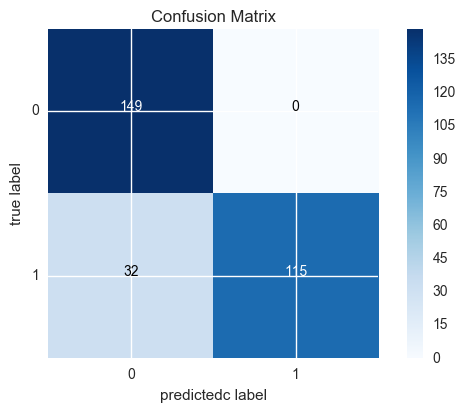

In [46]:
from __future__ import division
y_under_pred = clf.predict(X_norm_under_test)
print(confusion_matrix(Y_norm_under_test, y_under_pred))
cnf_matrix = confusion_matrix(Y_norm_under_test, y_under_pred)
np.set_printoptions(precision=2)
print("recall Metric in the test set: ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion Matrix")
plt.show()

In [47]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_norm_under_train,Y_norm_under_train)

C:\Users\Ajith Vajrala\Anaconda3\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[145   4]
 [ 23 124]]
recall Metric in the test set:  0.843537414966


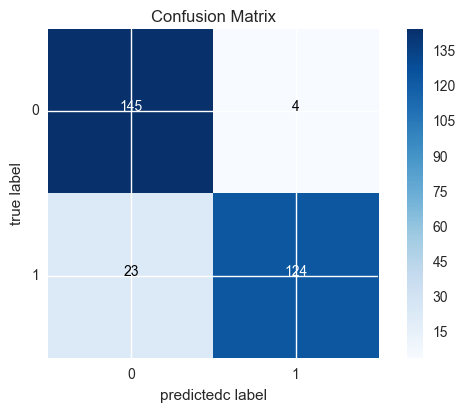

In [48]:
from __future__ import division
y_under_pred = clf1.predict(X_norm_under_test)
print(confusion_matrix(Y_norm_under_test, y_under_pred))
cnf_matrix = confusion_matrix(Y_norm_under_test, y_under_pred)
np.set_printoptions(precision=2)
print("recall Metric in the test set: ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion Matrix")
plt.show()

Approach 2
#_______________Over Sampling_______________#

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [35]:
#Over sampling using smote
X = df.ix[:, df.columns != "Class"]
Y = df.ix[:, df.columns == "Class"]
#
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test= train_test_split(X,Y, test_size=0.3, random_state = 0)
oversampler = SMOTE(random_state=0)
x_os, y_os = oversampler.fit_sample(X_smote_train, Y_smote_train)

C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print("No.od variables with class labels as 1: ", len(y_os[y_os==1]))
print("No.of variables with class labels as 0: ", len(y_os[y_os==0]))

No.od variables with class labels as 1:  199019
No.of variables with class labels as 0:  199019


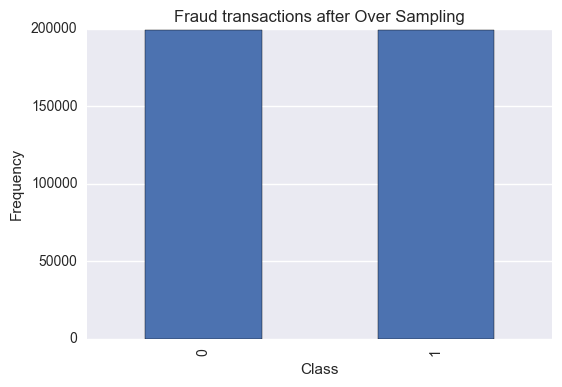

In [37]:
count_classes_smote = pd.value_counts(y_os, sort = True).sort_index()
count_classes_smote.plot(kind="bar")
plt.title("Fraud transactions after Over Sampling")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [38]:
#Random Forest classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_os,y_os)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

[[85279    17]
 [   26   121]]
recall Metric in the test set:  0.823129251701


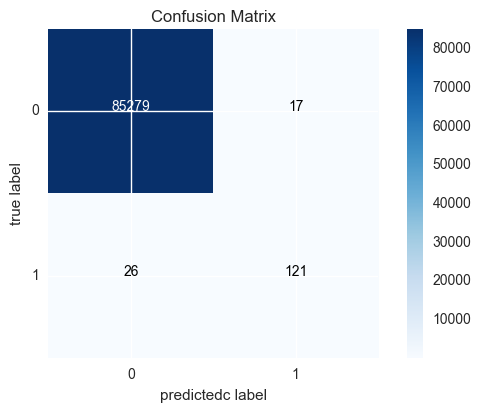

In [39]:
from __future__ import division
y_smote_pred = clf.predict(X_smote_test)
print(confusion_matrix(Y_smote_test, y_smote_pred))
cnf_matrix = confusion_matrix(Y_smote_test, y_smote_pred)
np.set_printoptions(precision=2)
print("recall Metric in the test set: ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion Matrix")
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(C=100, penalty= 'l1')
lr1.fit(x_os, y_os)
y_smote_pred = lr1.predict(X_smote_test)

[[83893  1403]
 [   16   131]]
recall Metric in the test set:  0.891156462585


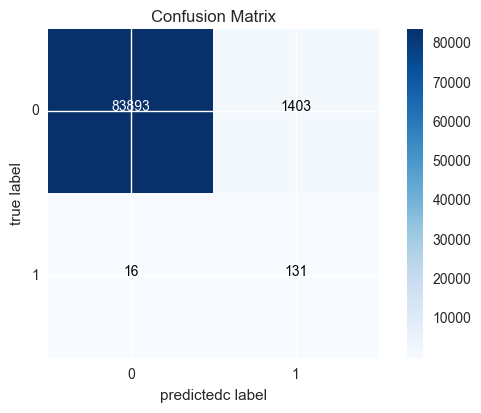

In [43]:
print(confusion_matrix(Y_smote_test, y_smote_pred))
cnf_matrix = confusion_matrix(Y_smote_test, y_smote_pred)
np.set_printoptions(precision=2)
print "recall Metric in the test set: ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1])
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion Matrix")
plt.show()

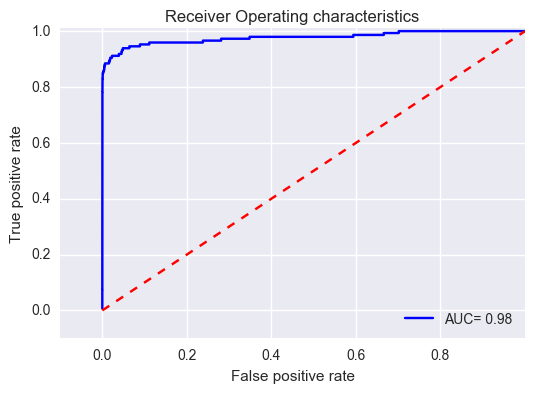

In [44]:
#AUC
y_pred_undersample_score = lr1.fit(x_os, y_os.ravel()).decision_function(X_smote_test.values)
fpr, tpr, thresholds = roc_curve(Y_smote_test, y_pred_undersample_score)
roc_auc = auc(fpr, tpr)

#plot ROC
plt.title("Receiver Operating characteristics")
plt.plot(fpr, tpr, 'b', label="AUC= %0.2f" %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [50]:
#___________#
#SVM classifier
clf = svm.SVC()
clf.fit(x_os,y_os)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[85245    51]
 [   71    76]]
recall Metric in the test set:  0.517006802721


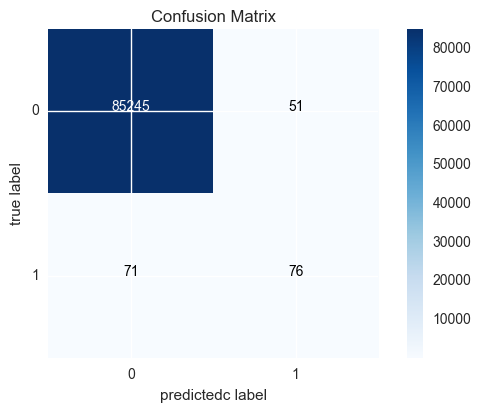

In [51]:
from __future__ import division
y_smote_pred = clf.predict(X_smote_test)
print confusion_matrix(Y_smote_test, y_smote_pred)
cnf_matrix = confusion_matrix(Y_smote_test, y_smote_pred)
np.set_printoptions(precision=2)
print "recall Metric in the test set: ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1])
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion Matrix")
plt.show()